<h1>K - means on Image

<h3>이미지를 K개의 색상으로 conversion

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from skimage import io
from sklearn.datasets import load_sample_image

sample = io.imread("sample.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(sample);

In [3]:
x,y,z = sample.shape

In [4]:
data = sample / 255.0 # use 0...1 scale
data = data.reshape(x * y, z)
data.shape

(518400, 3)

In [5]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [6]:
K_num = 8

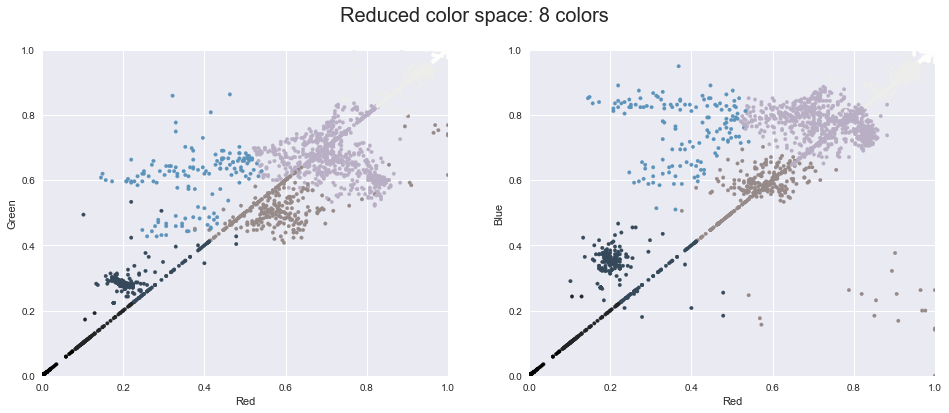

In [7]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(K_num)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: "+str(K_num)+" colors")

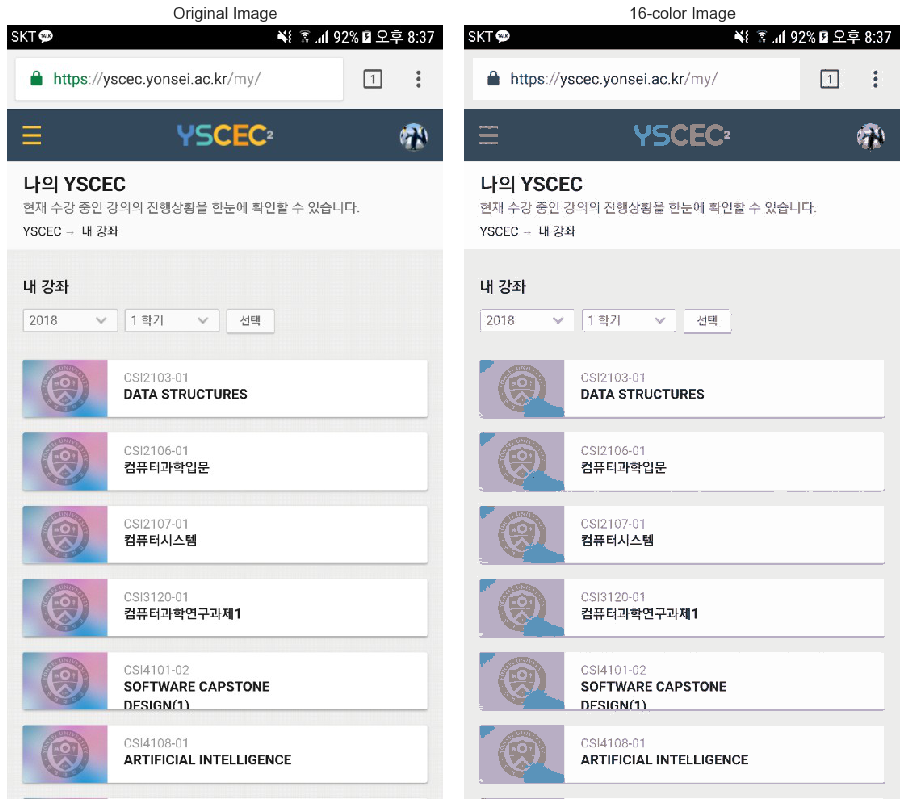

In [8]:
sample_recolored = new_colors.reshape(sample.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 16),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(sample)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(sample_recolored)
ax[1].set_title(str(K_num)+'-color Image', size=16);

In [9]:
new_colors

array([[0.00982547, 0.00982547, 0.00982547],
       [0.00982547, 0.00982547, 0.00982547],
       [0.00982547, 0.00982547, 0.00982547],
       ...,
       [0.92779911, 0.92771208, 0.92425639],
       [0.92779911, 0.92771208, 0.92425639],
       [0.92779911, 0.92771208, 0.92425639]])

In [10]:
target_colors = new_colors * 255
target_colors = np.int32(target_colors)
target_colors

array([[  2,   2,   2],
       [  2,   2,   2],
       [  2,   2,   2],
       ...,
       [236, 236, 235],
       [236, 236, 235],
       [236, 236, 235]])

<h3>목표</h3>
1. 이 target_colors에 있는 color가 K 개수만큼 그룹화할 수 있으니까 K개의 color를 target_colors array를 tarversing하면서 K 개의 색을 찾아내고 표시해준다
<br>
2. 표시한 색상중 하나를 선택할 시에 target_colors array에서 해당 컬러를 tarversing하면서 찾아내어 원하는 색으로 바꾼다

In [11]:
unique_rows = np.unique(target_colors, axis=0)
df = pd.DataFrame(unique_rows,columns=['R','G','B'])
#R,G,B 순서가 아니라서 a b c로 표현함

In [13]:
df

,R,G,B
0,2,2,2
1,34,36,37
2,54,73,90
3,90,147,186
4,149,137,136
5,184,174,196
6,236,236,235
7,253,253,253


In [12]:
unique_rows

array([[  2,   2,   2],
       [ 34,  36,  37],
       [ 54,  73,  90],
       [ 90, 147, 186],
       [149, 137, 136],
       [184, 174, 196],
       [236, 236, 235],
       [253, 253, 253]])

In [20]:
#예시로 [184,168,190]를 [255,0,0]으로 바꾼다하면
#[R,G,B] 순서는 pillow와 변함없음
index = 5
changed_target_colors = np.copy(target_colors)
np.place(changed_target_colors,changed_target_colors==unique_rows[index],[255,0,0])

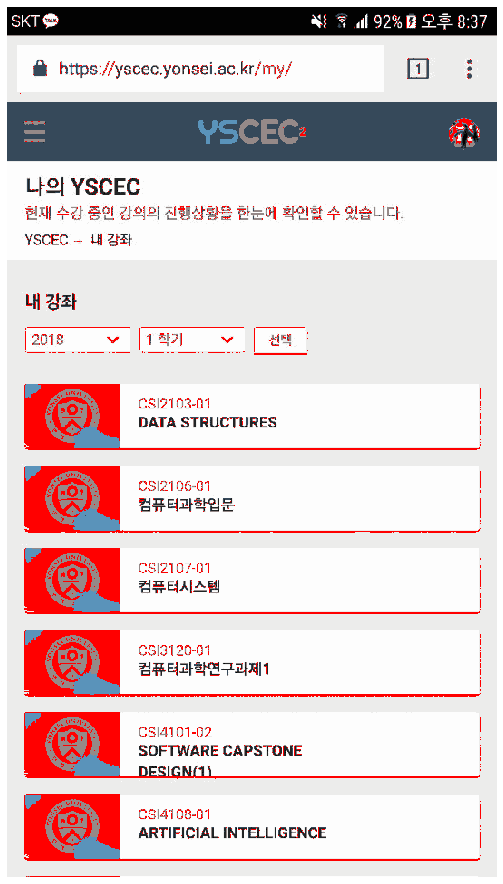

In [21]:
changed_target_colors = np.float64(changed_target_colors)
changed_target_colors /= 255
re_target_colored = changed_target_colors.reshape(sample.shape)
plt.figure(figsize=(16, 16))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(re_target_colored)